# Question 2 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
from wordcloud import WordCloud, STOPWORDS
import os
import networkx as nx
from os import path

In [2]:
terror = pd.read_excel('./global_terrorism_database.xlsx')
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaT,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


## Part 1

472

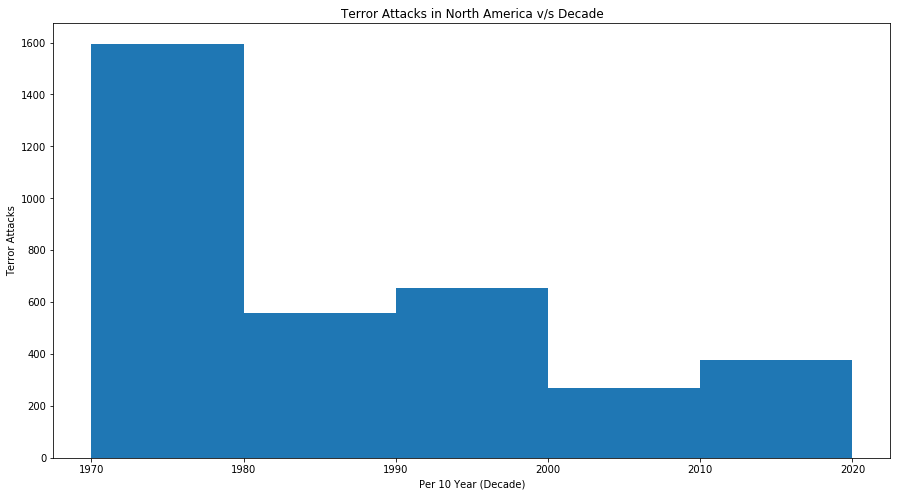

In [38]:
NA_year_list = terror['iyear'][terror['region_txt'] == 'North America']

plt.figure(figsize = (15, 8))
plt.hist(NA_year_list, bins = [1970, 1980, 1990, 2000, 2010, 2020])
plt.xlabel('Per 10 Year (Decade)')
plt.ylabel('Terror Attacks')
plt.title('Terror Attacks in North America v/s Decade')

### As seen from above plot, the decade `1970 - 1979` witnessed maximum number of terror attacks in North America.

## Part 2

In [ ]:
year_dict = {}
for index, row in terror.iterrows():
    year = str(row['iyear'])
    if year not in year_dict.keys():
        year_dict[year] = 1
    else:
        year_dict[year] += 1

year_dict

In [ ]:
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.bar(year_dict.keys(), year_dict.values())
plt.xlabel('Time (Year)')
plt.ylabel('Terror Attacks')
plt.title('Terror Attacks v/s Year')
for x, y in zip(year_dict.keys(), year_dict.values()):
    plt.text(x, y, str(y))

### From the plot above, it's clear that the year `2014` experieced most terror attacks.

In [ ]:
most_year_terror_data = terror[terror['iyear'] == 2014]
continent_dict = {}
for index, row in most_year_terror_data.iterrows():
    continent = row['region_txt']
    if continent not in continent_dict.keys():
        continent_dict[continent] = 1
    else:
        continent_dict[continent] += 1

continent_dict

In [ ]:
plt.figure(figsize = (15, 8))
plt.xticks(rotation = 90)
plt.bar(continent_dict.keys(), continent_dict.values())
plt.xlabel('Continent')
plt.ylabel('Terror Attacks')
plt.title('Terror Attacks in Year 2014 v/s Continent')
for x, y in zip(continent_dict.keys(), continent_dict.values()):
    plt.text(x, y, str(y))

### It can be seen from above plot that `Middle East and North Africa` witnessed most number of terror
### attacks in the year 2014.

## Part 3

In [ ]:
with open('wordcloud.txt', 'w') as file:
    for index, row in terror.iterrows():
        text = row['summary']
        if type(text) is float:
            continue
        file.write(text)
        file.write(' ')

(-0.5, 5999.5, 2999.5, -0.5)

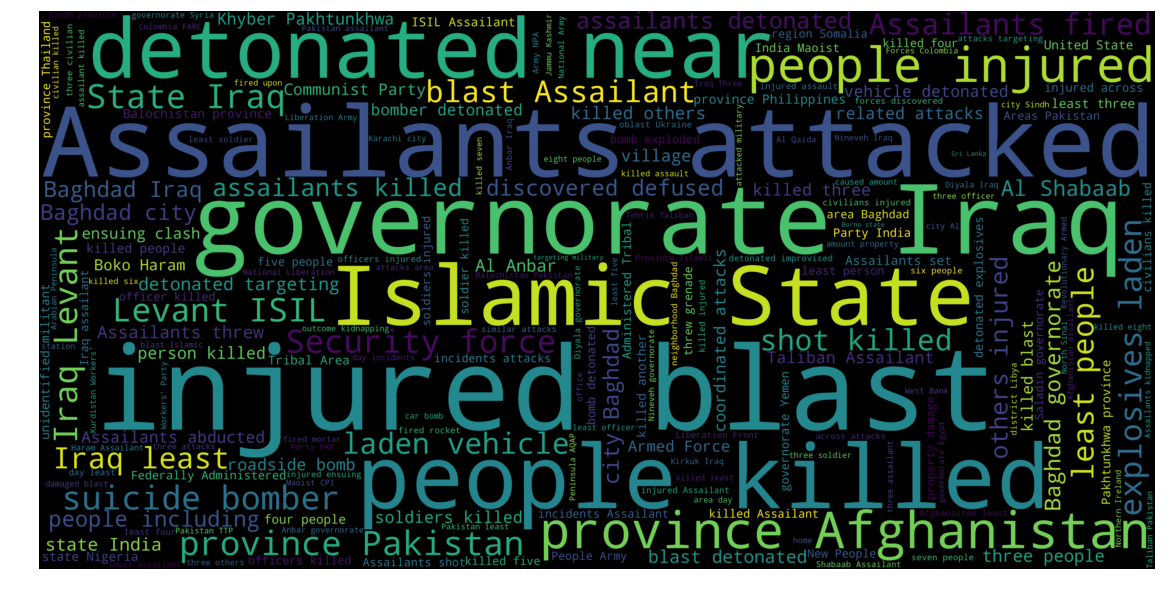

In [44]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'wordcloud.txt')).read()
stopwords = set(STOPWORDS)
stopwords.update(['number', 'nan', 'unknown', 'Unknown', 'group', 'claimed', 'responsibility', 'one', 'two', 'sources', 'attributed', 'incident', 'reported', 'casualties', 'attack', 'wounded', 'device', 'explosive', 'opened', 'fire', 'police', 'officer' 'near'])
wordcloud = WordCloud(stopwords = stopwords, height = 3000, width = 6000).generate(text)
plt.figure(figsize=(20,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [5]:
with open('motive.txt', 'w') as file:
    for index, row in terror.iterrows():
        text = row['motive']
        if type(text) is float:
            continue
        file.write(text)
        file.write(' ')

(-0.5, 5999.5, 2999.5, -0.5)

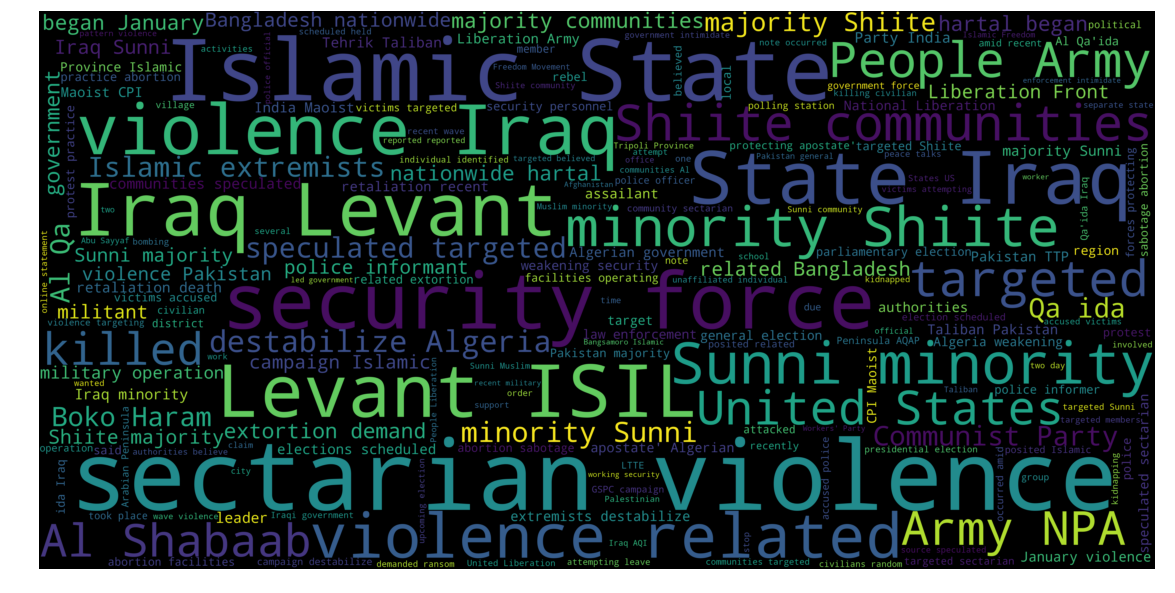

In [43]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'motive.txt')).read()
stopwords = set(STOPWORDS)
stopwords.update(['number', 'nan', 'unknown', 'Unknown', 'group', 'motive', 'specific', 'suspected', 'trend', 'sources', 'attributed', 'attack', 'claimed', 'responsibility', 'part', 'larger', 'stated', 'incident', 'may', 'carried', 'new', 'realted', 'voilence', 'member', 'area', 'noted', 'victim'])
wordcloud = WordCloud(stopwords = stopwords, height = 3000, width = 6000).generate(text)
plt.figure(figsize=(20,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Part 4

In [20]:
G = nx.Graph()
event = terror.iloc[:, 0]
G.add_nodes_from(event)
related_data = terror[terror['related'].notnull()]

for index, row in related_data.iterrows():
    r = []
    r = row['related'].strip().split(',')
    if len(r) != 0:
        for item in r:
            try:
                if int(item.strip()) != row['eventid']:
                    G.add_edge(row['eventid'], int(item.strip()))
            except:
                item = item.replace('\\','')
                item = item.replace(' and','')
                l = item.split(' ')[1:]
                for j in l:
                    try:
                        if int(j.strip()) != row['eventid']:
                            G.add_edge(row['eventid'], int(j.strip()))
                    except:
                        print(l)
G.number_of_nodes(), G.number_of_edges()

(181728, 82797)

/home/sagar/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


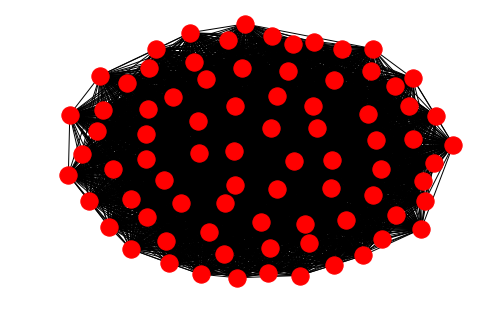

In [28]:
conn_comps = nx.connected_component_subgraphs(G)
count = 0
maxx = 0
max_comp = ()
for item in conn_comps:
    if len(item) > 1:
        count += 1
    if len(item) > maxx:
        maxx = len(item)
        max_comp = item

nx.draw(max_comp)